In [1]:
%pip install xarray

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/protocol.py", 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import NearestNDInterpolator

#np.version.version

In [3]:
ds = xr.open_dataset("mets/input_temp15.nc", engine="netcdf4")
ds_2 = xr.open_dataset("mets/input15.nc", engine="netcdf4")

/tmp/ipykernel_67449/3067810431.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset("mets/input_temp15.nc", engine="netcdf4")
/tmp/ipykernel_67449/3067810431.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_2 = xr.open_dataset("mets/input15.nc", engine="netcdf4")


In [4]:
print(ds)

<xarray.Dataset> Size: 116kB
Dimensions:                              (altitude: 30, time: 120)
Coordinates:
  * altitude                             (altitude) float32 120B 0.1109 ... 4...
  * time                                 (time) timedelta64[ns] 960B 00:00:00...
Data variables:
    pressure                             (altitude) float32 120B ...
    temperature                          (altitude, time) float32 14kB ...
    specific_cloud_liquid_water_content  (altitude, time) float32 14kB ...
    specific_cloud_ice_water_content     (altitude, time) float32 14kB ...
    specific_humidity                    (altitude, time) float32 14kB ...
    fraction_of_cloud_cover              (altitude, time) float32 14kB ...
    moist_density                        (altitude, time) float32 14kB ...
    cloud_LWC                            (altitude, time) float32 14kB ...
    cloud_IWC                            (altitude, time) float32 14kB ...


In [5]:
print(ds["pressure"].values)
print(ds["moist_density"].values)

[1000.        975.        950.        925.        900.        875.
  850.        825.        800.        750.        700.        650.
  600.        550.        500.00003   450.        400.        350.
  299.99997   250.        200.        150.        100.         70.00001
   50.00001    30.000006   19.999998   10.          5.          1.      ]
[[1.1975577  1.1974046  1.1972647  ... 1.181028   1.1811004  1.1811733 ]
 [1.1676188  1.1674695  1.167333   ... 1.1515024  1.1515728  1.151644  ]
 [1.1376798  1.1375344  1.1374015  ... 1.129061   1.1291853  1.1293077 ]
 ...
 [0.01513034 0.01513178 0.01513341 ... 0.01510311 0.01510802 0.01511347]
 [0.0072998  0.00730132 0.00730234 ... 0.00733431 0.0073348  0.00733531]
 [0.00145996 0.00146026 0.00146047 ... 0.00146686 0.00146696 0.00146706]]


In [6]:
#indices = np.where(np.isfinite(ds["temperature"]))
#interp = NearestNDInterpolator(np.transpose(indices), ds["temperature"].values[indices])
#ds["temperature"][...] = interp(*np.indices(ds["temperature"].shape)) 

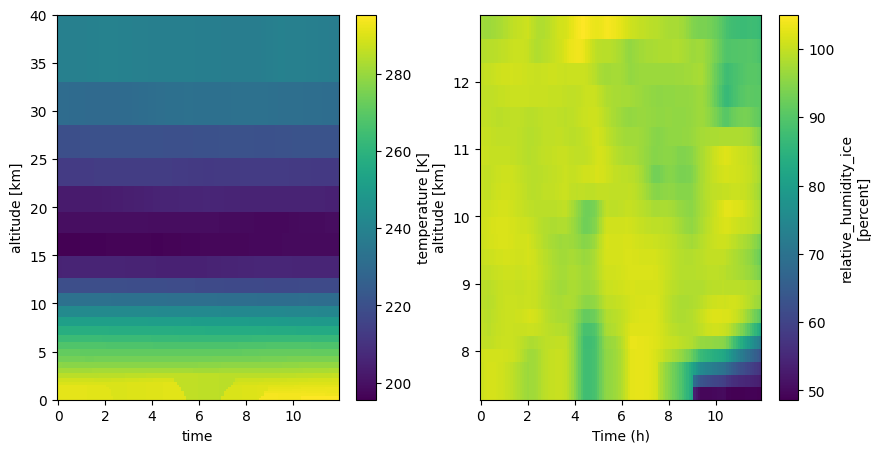

In [7]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ds.coords['time'] = ds.coords['time'].astype('float')/(10**9 * 60 * 60)
ds["temperature"].plot(ax = axes[0])

axes[0].set_ylim(0,40)

ds_2.coords['time'] = ds_2.coords['time'].astype('float')/(10**9 * 60 * 60)
ds_2["relative_humidity_ice"].plot(ax = axes[1])

plt.xlabel("Time (h)")
plt.show()




In [8]:
ds_2["temperature"].sel(time=0,altitude=10.9,method='nearest').values

array(227.34677, dtype=float32)

In [9]:
#ds["specific_cloud_liquid_water_content"] = ds["specific_cloud_liquid_water_content"].fillna(0)
#ds["specific_cloud_ice_water_content"] = ds["specific_cloud_ice_water_content"].fillna(0)

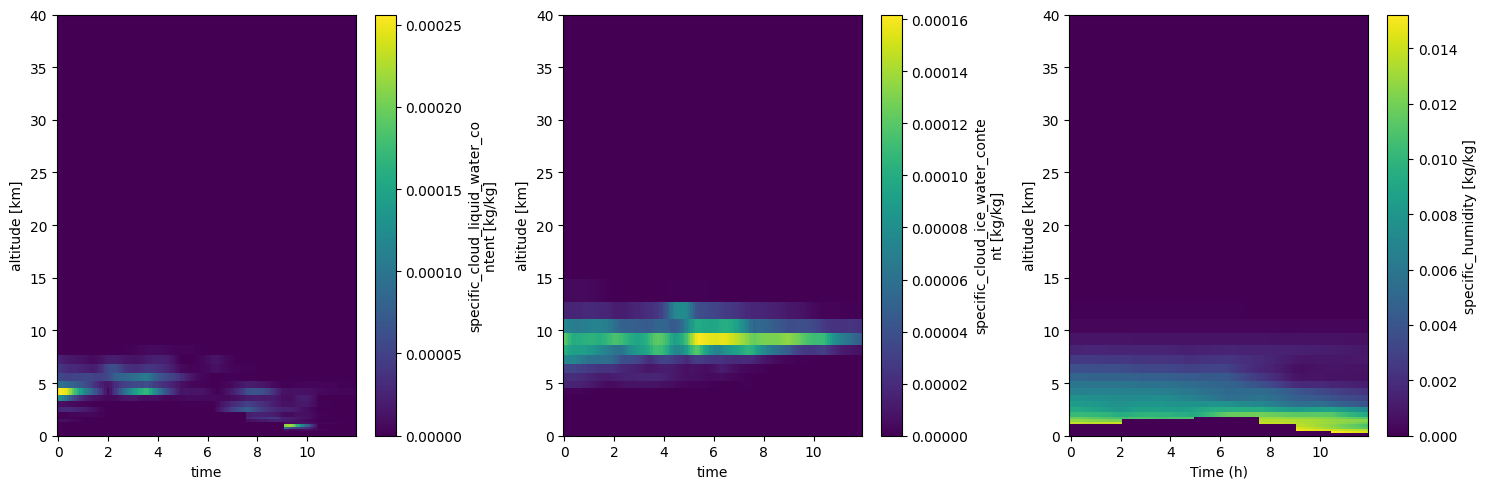

In [10]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ds["specific_cloud_liquid_water_content"].plot(ax = axes[0])
ds["specific_cloud_ice_water_content"].plot(ax = axes[1])
ds["specific_humidity"].plot(ax = axes[2])

axes[0].set_ylim(0,40)
axes[1].set_ylim(0,40)
axes[2].set_ylim(0,40)

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

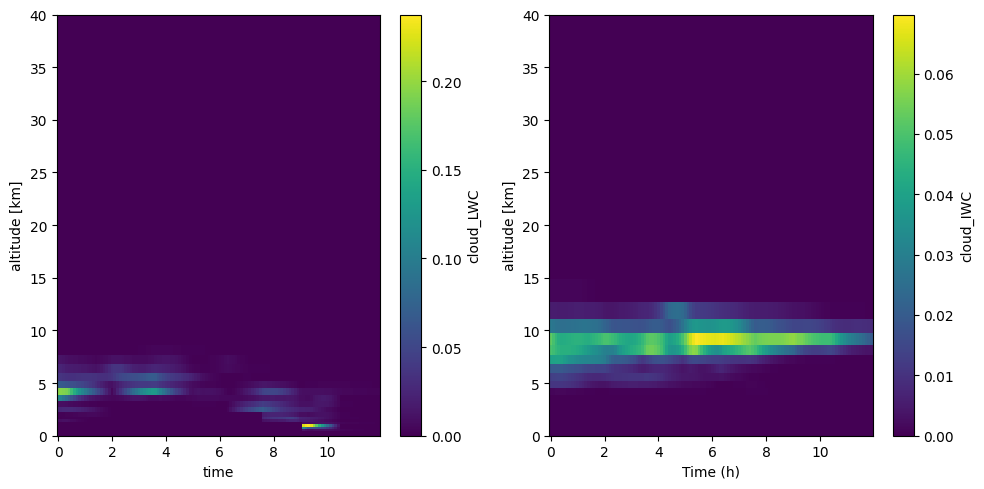

In [11]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ds["cloud_LWC"].plot(ax = axes[0])
ds["cloud_IWC"].plot(ax = axes[1])

axes[0].set_ylim(0,40)
axes[1].set_ylim(0,40)

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

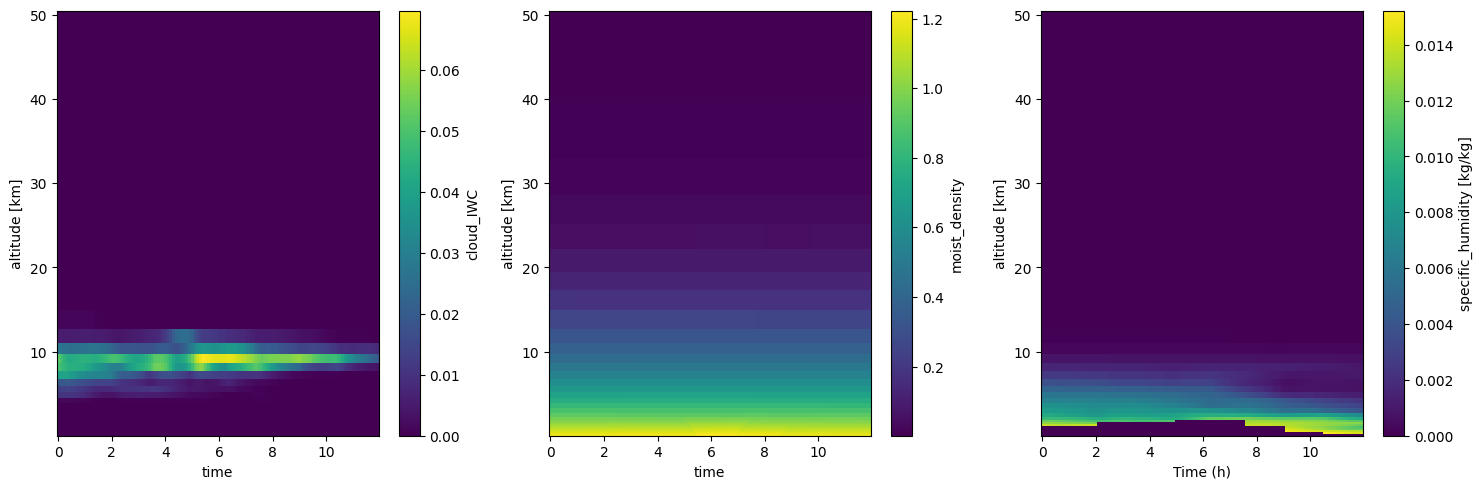

In [12]:
# Convert time coordinate to numeric type for plotting

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ds["cloud_IWC"].plot(ax = axes[0])
ds["moist_density"].plot(ax = axes[1])
ds["specific_humidity"].plot(ax = axes[2])

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

[0.         0.         0.         0.         0.         0.
 0.04090604 0.01623319 0.00571938 0.06193036 0.12477992 0.44138187
 0.8120576  0.6618462  0.79800606 0.6850993  0.6685263  0.7579916
 0.8861329  0.87609494 0.678941   0.31702286 0.         0.
 0.         0.         0.         0.         0.         0.        ]


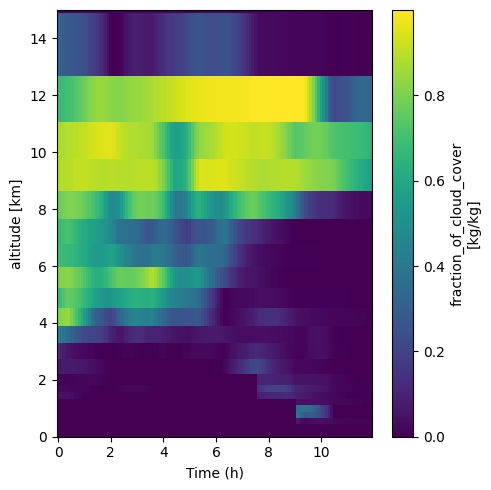

In [13]:

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ds["fraction_of_cloud_cover"].plot(ax = axes)

axes.set_ylim(0,15)

eee = ds.sel(time = 0, method='nearest')
print((eee["fraction_of_cloud_cover"]).values)

fig.tight_layout()

plt.xlabel("Time (h)")
plt.show()

In [14]:
%pip install openpyxl

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.10/site-packages/pip/_vendor/rich/protocol.py", 

In [15]:
import pandas as pd

In [16]:
df = pd.read_pickle("flight_data/flightlist_20190101_20190131.pkl")

In [17]:
df["typecode"].dropna().value_counts().to_excel("output.xlsx")